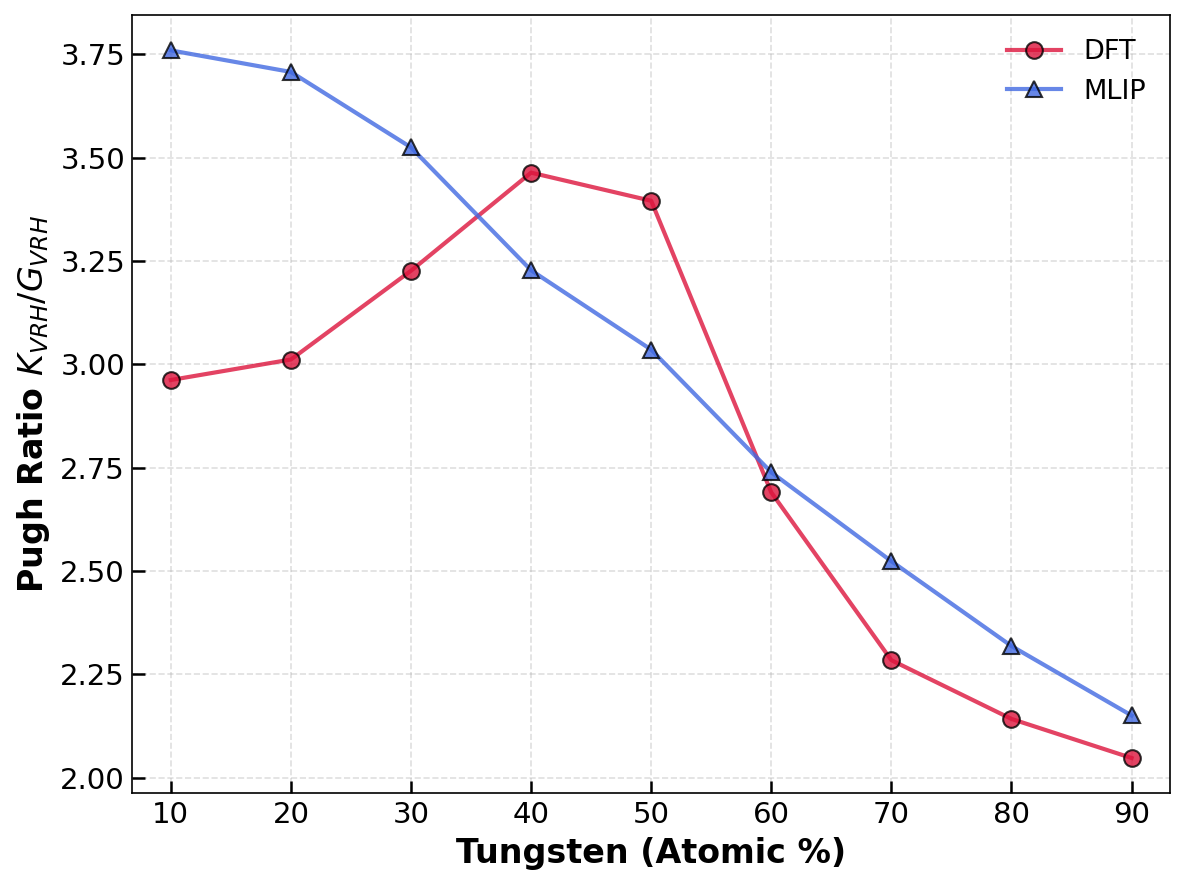

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## results for W-Ta-Nb with 10% Nb

# ## DFT results - Ordered structures
# dft_tungsten_fractions_ordered =  np.array([ 10., 20., 30., 40., 50., 60., 70., 80., 90.])
# dft_pugh_ratios_ordered = np.array([ 0.34324675, 0.34912595, 0.33369983, 0.30497093,
#        0.33713944, 0.42523204, 0.44101181, 0.45739606, 0.47589346])

## DFT results - SQS structures
dft_tungsten_fractions_sqs = np.array([10., 20., 30., 40., 50., 60., 70., 80., 90.])
dft_pugh_ratios_sqs = 1/np.array([0.33763267, 0.33207531, 0.30996744, 0.28872875, 0.29451655,
       0.37176255, 0.43784302, 0.46687512, 0.48842478])


# ## MLP results - Ordered structures
# mlp_tungsten_fractions_ordered = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# mlp_pugh_ratios_ordered = [0.27989756, 0.2943794 , 0.31839035, 0.33716728,
#        0.35332114, 0.37831264, 0.4050512 , 0.43741279, 0.4668879]

## MLP results - SQS structures
mlp_tungsten_fractions_sqs = [10, 20, 30, 40, 50, 60, 70, 80, 90]
mlp_pugh_ratios_sqs = 1/np.array([0.26601126, 0.26975784, 0.28372736, 0.30986448,
       0.3294643 , 0.36515829, 0.39628481, 0.43136561, 0.46506494])

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# --- DFT SQS structures in red ---
plt.plot(
    dft_tungsten_fractions_sqs, dft_pugh_ratios_sqs,
    '-o',
    color='crimson',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='DFT'
)

# --- MLP SQS structures ---
plt.plot(
    mlp_tungsten_fractions_sqs, mlp_pugh_ratios_sqs,
    '-^',
    color='royalblue',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='MLIP'
)

# --- Labels and formatting ---
plt.xlabel('Tungsten (Atomic %)', fontsize=16, fontweight='bold')
plt.ylabel('Pugh Ratio $K_{VRH}/G_{VRH}$', fontsize=16, fontweight='bold')

# --- Axes styling ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2, colors='black')

# --- Grid styling ---
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# --- Legend ---
plt.legend(fontsize=13, frameon=False, loc='best')

# --- Margins and layout ---
plt.margins(x=0.04)
plt.tight_layout()

plt.show()

In [74]:
import pandas as pd
df = pd.read_csv('CrackMeasurements.csv')
## exclude because it has umelted particles
df = df.query("Sample!='W60'")
df

,Sample,W Content,Std. Dev,Image Size (mm^2),Crack Fraction (mm/mm^2),Std. Deviation (from 4-tile image),Notes
0,W20,23,1.0,0.56,0.00,0.00,High-res image with no cracks visible
1,W30,30,1.5,2.65,0.00,0.00,NaN
2,W50-1,51,3.0,2.35,2.97,1.65,Also noted as W43 in some presentations
3,W50-2,56,3.5,2.02,7.67,0.87,Second build
4,W55,64,2.3,12.25,7.94,3.97,High standard deviation due to inclusion of lo...
6,W80,80,3.0,2.00,10.18,4.67,High standard deviation due to inclusion of lo...


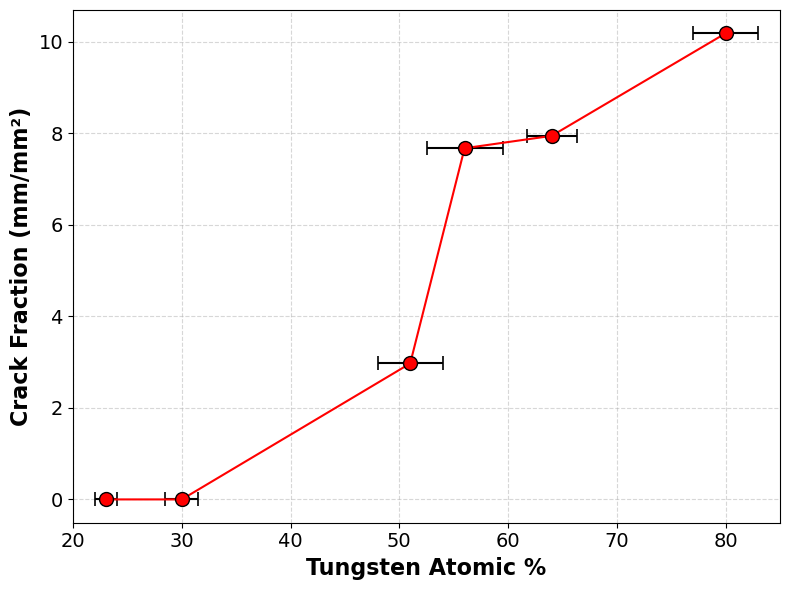

In [106]:
plt.figure(figsize=(8, 6))
plt.errorbar(
    df["W Content"],
    df["Crack Fraction (mm/mm^2)"],
    xerr=df["Std. Dev"],
    # yerr=df["Std. Deviation (from 4-tile image)"],
    fmt='o-',
    ecolor='black',
    elinewidth=1.5,
    capsize=5,
    capthick=1.2,
    color='red',
    markersize=10,
    markeredgecolor='black',
    label="Crack fraction"
)

# --- Styling ---
plt.xlabel("Tungsten Atomic %", fontsize=16, fontweight='bold')
plt.ylabel("Crack Fraction (mm/mm²)", fontsize=16, fontweight='bold')
plt.xlim(20,85)
# plt.title("Crack Fraction vs Tungsten Atomic %", fontsize=18, fontweight='bold', pad=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [77]:
# calculate the tungsten fraction for each alloy based on 'Sample' column which has W20 for 20% W, W30 for 30% W, etc.
df['Tungsten_percentage'] = df['Sample'].str.extract(r'W(\d+)').astype(float)

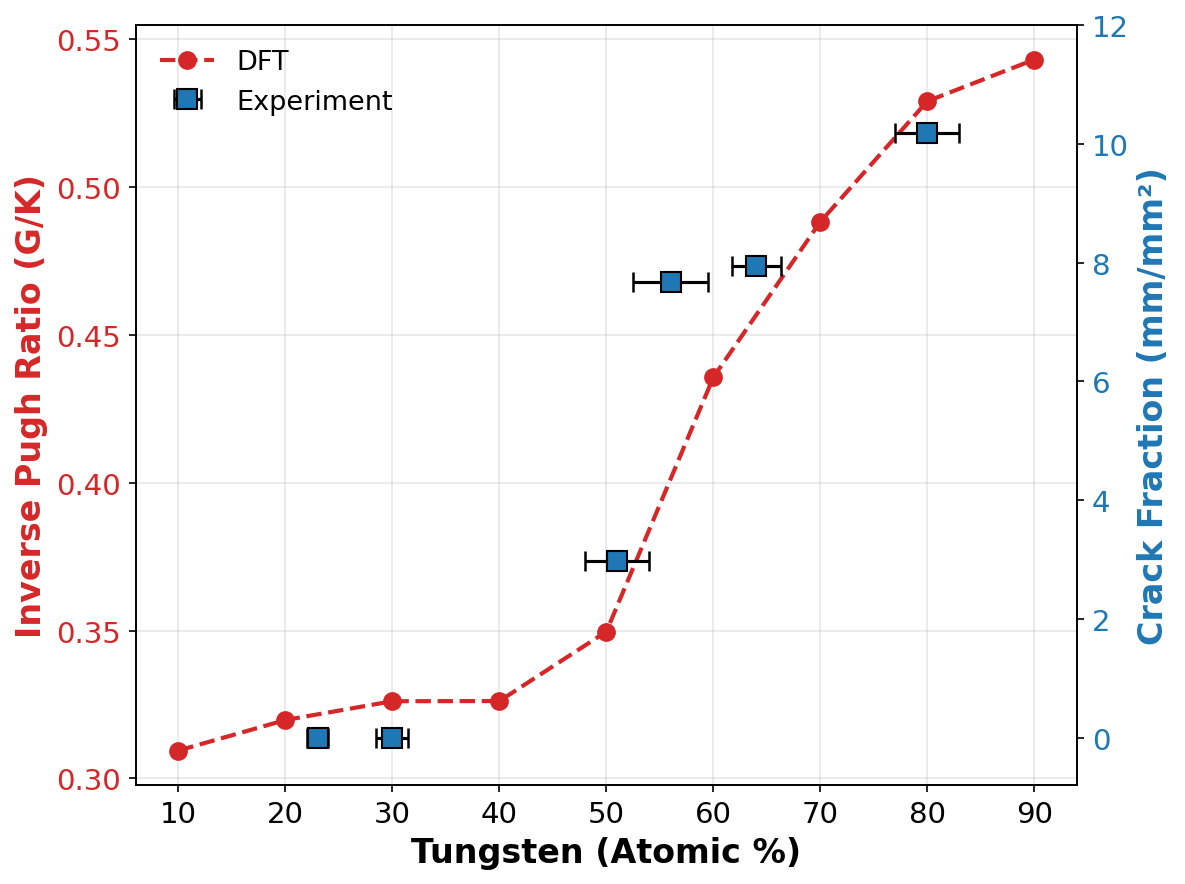

In [133]:
# DFT data (Ordered and SQS)
dft_tungsten_fractions_ordered =  [10., 20., 30., 40., 50., 60., 70., 80., 90.]
dft_pugh_ratios_ordered = np.array([0.29535822, 0.35076316, 0.37598712, 0.3662548,
                                    0.41086948, 0.50134715, 0.50257442, 0.52340443, 0.53076992])

dft_tungsten_fractions_sqs = [10., 20., 30., 40., 50., 60., 70., 80., 90.]
dft_pugh_ratios_sqs = np.array([0.30941686, 0.31974194, 0.32610441, 0.32615475,
                                0.34965427, 0.43568469, 0.48830741, 0.52908806, 0.54319631])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=150)

# --- Plot DFT Pugh ratios on left y-axis ---
# ax1.plot(dft_tungsten_fractions_ordered, dft_pugh_ratios_ordered,
#          'o-', color='tab:blue', markersize=8, linewidth=2, label='DFT Ordered')
ax1.plot(dft_tungsten_fractions_sqs, dft_pugh_ratios_sqs,
         'o--', color='tab:red', markersize=8, linewidth=2, label='DFT')

# Configure left y-axis
ax1.set_xlabel('Tungsten (Atomic %)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Inverse Pugh Ratio (G/K)', color='tab:red', fontsize=16, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.grid(alpha=0.3)

# --- Create right y-axis for experimental crack data ---
ax2 = ax1.twinx()
ax2.set_ylabel('Crack Fraction (mm/mm²)', color='tab:blue', fontsize=16, fontweight='bold')

# Plot experimental crack fractions with error bars
ax2.errorbar(
    df["W Content"],
    df["Crack Fraction (mm/mm^2)"],
    xerr=df["Std. Dev"],
    # yerr=df["Std. Deviation (from 4-tile image)"],
    fmt='s',
    ecolor='black',
    elinewidth=1.5,
    capsize=5,
    capthick=1.2,
    color='tab:blue',
    markersize=10,
    markeredgecolor='black',
    label="Experiment"
)

# Style the secondary y-axis
ax2.tick_params(axis='y', labelcolor='tab:blue', labelsize=14)
# ax2.set_ylim(-0.5, max(df["Crack Fraction (mm/mm^2)"] + df["Std. Deviation (from 4-tile image)"])*1.05)
ax2.set_ylim(-0.8,12)

# --- Combine legends ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=13, frameon=False)

# plt.title("Pugh Ratio and Crack Fraction vs Tungsten Content", fontsize=18, fontweight='bold', pad=15)
plt.tight_layout()